In [3]:
from google.colab import drive
import os
import pandas as pd

# ربط Google Colab بحساب Google Drive
drive.mount('/content/drive')


# مسارات المجلدين في Google Drive
deforestation_dir = '/content/drive/My Drive/Dataset/deforestation/'  # مسار مجلد صور deforestation
no_deforestation_dir = '/content/drive/My Drive/Dataset/no_deforestation/'  # مسار مجلد صور no_deforestation

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# دالة لتحميل الصور مع التحقق من الامتداد
def load_and_preprocess_image(image_path):
    try:
        img = load_img(image_path, target_size=(224, 224))  # تحديد حجم الصورة
        img_array = img_to_array(img)
        return img_array
    except Exception as e:
        print(f"Error loading {image_path}: {e}")
        return None

# قائمة لتخزين الصور والفئات
images = []
labels = []

# تحميل الصور من مجلد deforestation
for filename in os.listdir(deforestation_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # التحقق من الامتداد
        img_path = os.path.join(deforestation_dir, filename)
        img_array = load_and_preprocess_image(img_path)
        if img_array is not None:  # إضافة الصورة إذا تم تحميلها بنجاح
            images.append(img_array)
            labels.append(1)  # الفئة 1 لـ deforestation

# تحميل الصور من مجلد no_deforestation
for filename in os.listdir(no_deforestation_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # التحقق من الامتداد
        img_path = os.path.join(no_deforestation_dir, filename)
        img_array = load_and_preprocess_image(img_path)
        if img_array is not None:  # إضافة الصورة إذا تم تحميلها بنجاح
            images.append(img_array)
            labels.append(0)  # الفئة 0 لـ no_deforestation

# تحويل القوائم إلى مصفوفات numpy
X = np.array(images)
y = np.array(labels)

# طباعة الأشكال للتأكد
print(f'Images shape: {X.shape}')
print(f'Labels shape: {y.shape}')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Images shape: (500, 224, 224, 3)
Labels shape: (500,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - accuracy: 0.5409 - loss: 1.1038 - val_accuracy: 0.9100 - val_loss: 0.4577
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.8818 - loss: 0.3893 - val_accuracy: 0.8800 - val_loss: 0.3019
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.8495 - loss: 0.3405 - val_accuracy: 0.9100 - val_loss: 0.2664
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.9021 - loss: 0.2344 - val_accuracy: 0.9200 - val_loss: 0.2399
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.8882 - loss: 0.2449 - val_accuracy: 0.9300 - val_loss: 0.2139
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.9293 - loss: 0.2169 - val_accuracy: 0.9300 - val_loss: 0.1823
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.9607 - loss: 0.1463 - val_accuracy: 0.8700 - val_loss: 0.3270
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.9125 - loss: 0.2279 - val_accuracy: 0.9100 - val_loss:

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9158 - loss: 0.2074
Test accuracy: 0.9300000071525574
Test loss: 0.1561293601989746


In [7]:
model.save('final_deforestation_model.h5')


In [8]:
model.save('final_deforestation_model.keras')


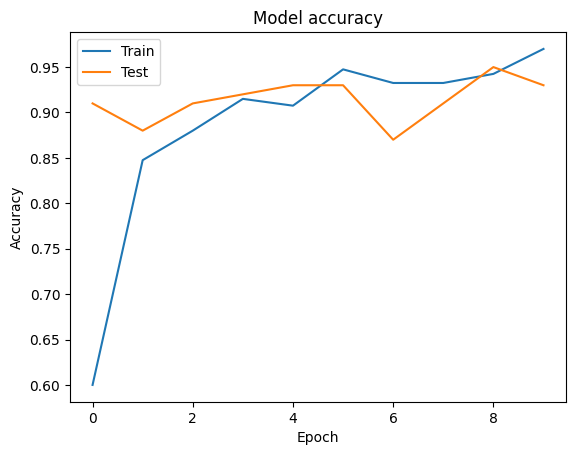

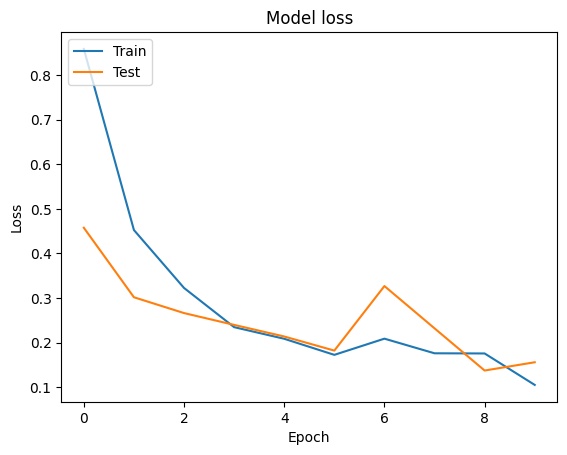

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [10]:
# أولاً، نربط Google Drive بجوجل كولاب
from google.colab import drive
drive.mount('/content/drive')

import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# مسار مجلد الصور الجديدة في Google Drive
new_images_dir = '/content/drive/My Drive/DataTest/'  # استبدل المسار بمسار المجلد الخاص بك في Google Drive

# دالة لتحضير الصورة
def preprocess_new_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # تغيير حجم الصورة إلى 224x224 بكسل
    img_array = img_to_array(img)  # تحويل الصورة إلى مصفوفة أرقام
    img_array = np.expand_dims(img_array, axis=0)  # إضافة بعد جديد لتناسب متطلبات النموذج
    img_array /= 255.0  # تطبيع الصورة لتكون القيم بين 0 و 1
    return img_array

# قائمة لتخزين النتائج
results = []

# حلقة لتحميل الصور الجديدة ومعالجتها
for filename in os.listdir(new_images_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # التحقق من أن الملف هو صورة
        image_path = os.path.join(new_images_dir, filename)
        processed_image = preprocess_new_image(image_path)  # معالجة الصورة

        # التنبؤ باستخدام النموذج المدرب
        prediction = model.predict(processed_image)

        # تحديد الفئة بناءً على التنبؤ
        if prediction[0][0] > 0.5:
            result = (filename, "Deforestation")
        else:
            result = (filename, "No Deforestation")

        # إضافة النتيجة إلى القائمة
        results.append(result)
        print(f"Image: {filename}, Prediction: {result[1]}")

# عرض جميع النتائج
print("All predictions completed.")
for res in results:
    print(f"Image: {res[0]}, Prediction: {res[1]}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Image: img78.png, Prediction: No Deforestation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Image: img104.png, Prediction: Deforestation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image: img100.jpg, Prediction: Deforestation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: img1.jpg, Prediction: Deforestation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: img10.jpg, Prediction: Deforestation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Image: img133.jpg, Prediction: Deforestation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: img131.jpg, Prediction: Deforestation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: img13.jpg, Prediction: Deforestation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: img130.jpg, Prediction: Deforestation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image: img129.jpg, Prediction: Deforestation
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Imag

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد مولد البيانات مع تعزيز البيانات
train_datagen = ImageDataGenerator(
    rescale=1./255,          # تطبيع الصور
    rotation_range=20,       # تدوير الصور بزاوية تصل إلى 20 درجة
    width_shift_range=0.2,   # تغيير العرض بنسبة تصل إلى 20%
    height_shift_range=0.2,  # تغيير الارتفاع بنسبة تصل إلى 20%
    shear_range=0.2,         # إمالة الصور
    zoom_range=0.2,          # تكبير/تصغير الصور
    horizontal_flip=True,    # عكس الصور أفقياً
    fill_mode='nearest'      # كيفية ملء البكسلات التي تم إزالتها بعد التحويل
)

test_datagen = ImageDataGenerator(rescale=1./255)

# استخدام مولد البيانات لتدريب النموذج
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
validation_generator = test_datagen.flow(X_test, y_test, batch_size=32)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# إعادة بناء النموذج مع تحسينات
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))  # إضافة طبقة إضافية
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # زيادة عدد الخلايا العصبية
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# إعداد التوقف المبكر
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# تدريب النموذج مع التوقف المبكر
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=50,  # يمكنك تجربة زيادة عدد الدورات (Epochs)
    validation_data=validation_generator,
    validation_steps=len(X_test) // 32,
    callbacks=[early_stop]  # إضافة التوقف المبكر هنا
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.5306 - loss: 0.6972 - val_accuracy: 0.5312 - val_loss: 0.6919
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3750 - loss: 0.6978 - val_accuracy: 0.7500 - val_loss: 0.6819
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 63s 5s/step - accuracy: 0.4739 - loss: 0.6940 - val_accuracy: 0.5417 - val_loss: 0.6931
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5625 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.4616 - loss: 0.6935 - val_accuracy: 0.4688 - val_loss: 0.6934
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4062 - loss: 0.6947 - val_accuracy: 0.2500 - val_loss: 0.6953
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - accuracy: 0.5317 - loss: 0.6929 - val_accuracy: 0.4479 - val_loss: 0.6940


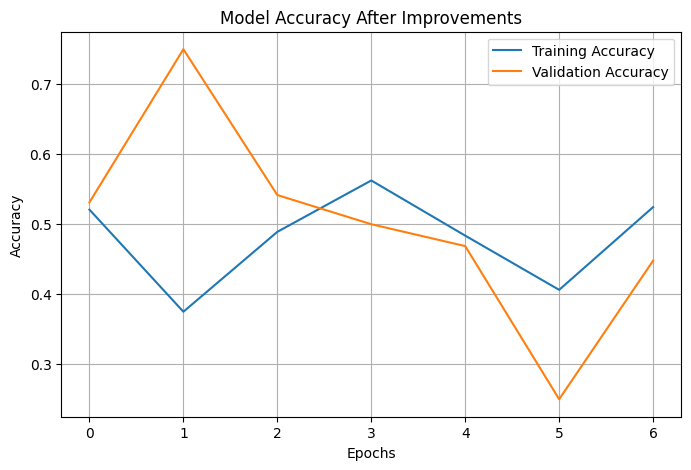

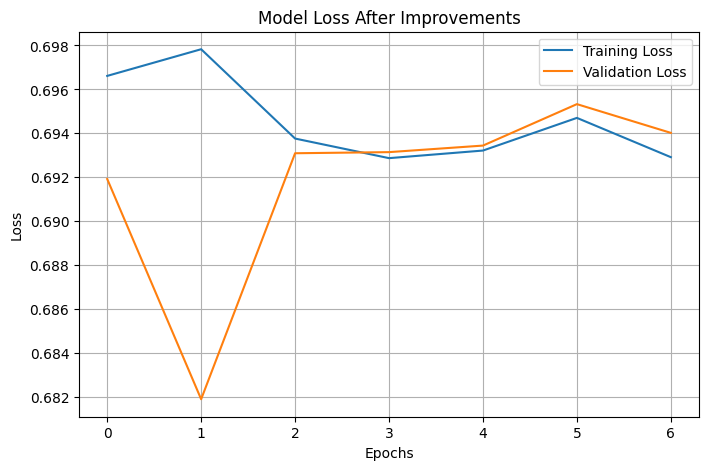

In [15]:
import matplotlib.pyplot as plt

# رسم دقة التدريب والتحقق
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy After Improvements')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# رسم خسارة التدريب والتحقق
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss After Improvements')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

# إعداد التوقف المبكر (اختياري)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# إعادة تدريب النموذج
history = model.fit(
    X_train, y_train,  # استخدم نفس بيانات التدريب
    epochs=50,  # يمكنك ضبط عدد الدورات (Epochs) حسب الحاجة
    batch_size=32,
    validation_data=(X_test, y_test),  # استخدم نفس بيانات التحقق (الاختبار)
    callbacks=[early_stop]  # إضافة التوقف المبكر إذا كان ذلك مفيدًا
)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.5372 - loss: 0.7250 - val_accuracy: 0.6200 - val_loss: 0.6794
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.5113 - loss: 0.7243 - val_accuracy: 0.4700 - val_loss: 0.6730
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.6089 - loss: 0.6471 - val_accuracy: 0.4600 - val_loss: 0.6724
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.5743 - loss: 0.6793 - val_accuracy: 0.4700 - val_loss: 0.6682
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.5211 - loss: 0.6923 - val_accuracy: 0.4700 - val_loss: 0.6628
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step - accuracy: 0.6126 - loss: 0.6526 - val_accuracy: 0.4700 - val_loss: 0.6565
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - accuracy: 0.6439 - loss: 0.6346 - val_accuracy: 0.4800 - val_loss: 0.6487
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.6051 - loss: 0.6524 - val_accuracy: 0.5600 - val_loss:

In [23]:
pip install twilio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.9 MB/s eta 0:00:00


In [26]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

def send_email_alert(subject, body):
    # Email settings
    smtp_server = 'smtp.gmail.com'
    smtp_port = 587
    sender_email = 'rimasaljalal.2003@gmail.com'  # Replace with your email address
    sender_password = 'kqtn lhsj ugol vgqw'  # Replace with your App Password
    recipient_email = 'bawared988.rr@gmail.com'  # Replace with recipient's email address

    # Set up the email message
    message = MIMEMultipart()
    message['From'] = sender_email
    message['To'] = recipient_email
    message['Subject'] = subject

    # Add the body content to the email
    message.attach(MIMEText(body, 'plain'))

    # Send the email
    try:
        server = smtplib.SMTP(smtp_server, smtp_port)
        server.starttls()  # Start TLS for security
        server.login(sender_email, sender_password)
        server.send_message(message)
        server.quit()
        print("Email sent successfully.")
    except Exception as e:
        print(f"Failed to send email. Error: {e}")

# Example usage
send_email_alert('Deforestation Alert', 'Deforestation detected with high confidence!')


Email sent successfully.


In [28]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# تحميل الصور من جهازك إلى Google Colab
uploaded = files.upload()


Saving img51.jpg to img51 (1).jpg
Saving img128.jpg to img128.jpg


In [29]:
image_arrays = []

# معالجة كل صورة تم تحميلها
for image_name in uploaded.keys():
    # تحميل الصورة وتحويلها إلى مصفوفة
    img = load_img(image_name, target_size=(224, 224))  # ضبط الحجم بما يتناسب مع النموذج
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # إضافة بعد إضافي لتتناسب مع توقعات النموذج (batch size)
    img_array /= 255.0  # تطبيع البيانات
    image_arrays.append((image_name, img_array))  # إضافة الصورة المعالجة إلى القائمة


In [31]:
# نفترض أن لديك نموذج تم تدريبه مسبقاً وتسميه 'model'
threshold = 0.5  # يمكنك تعديل العتبة بناءً على متطلباتك

for image_name, img_array in image_arrays:
    # تنفيذ التنبؤ باستخدام النموذج
    prediction = model.predict(img_array)

    # التحقق من النتيجة وإرسال التنبيه إذا تم الكشف عن إزالة الغابات
    if prediction[0][0] > threshold:
        print(f"Deforestation detected in {image_name}")
        send_email_alert('Deforestation Alert', f"Deforestation detected in the image {image_name} with a confidence level of {prediction[0][0] * 100:.2f}%.")
    else:
        print(f"No deforestation detected in {image_name}")
        send_email_alert('No Deforestation Detected', f"No deforestation detected in the image {image_name}. Confidence level: {prediction[0][0] * 100:.2f}%.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
No deforestation detected in img51 (1).jpg
Email sent successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Deforestation detected in img128.jpg
Email sent successfully.
